Data from FE statistics

In [43]:
# typical imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import sqlite3

In [167]:
# I was going to scrape "https://motorsportstats.com/series/abb-fia-formula-e-world-champioonship/summary/", but there doesnt seem to be 
# a way to break down specific points finishes so I will import a pre-existing .csv that contains the same data. 

drivers = pd.read_csv("drivers.csv", encoding='ISO-8859-1') # very annoying error while imporing had to be fixed for drivers and eprix
eprix = pd.read_csv("eprix.csv", encoding='ISO-8859-1')
powertrains = pd.read_csv("powertrains.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
seasons = pd.read_csv("seasons.csv")
teams = pd.read_csv("teams.csv")

In [169]:
# quicly explore the different files we have

print(drivers.isnull().sum())
print(eprix.isnull().sum())
print(powertrains.isnull().sum())
print(races.isnull().sum())
print(results.isnull().sum())
print(seasons.isnull().sum())
print(teams.isnull().sum())

# Look like there are some empty items in "results" but that is to be expected

driverId       0
firstname      0
lastname       0
nationality    0
dtype: int64
eprixId          0
eprixRef         0
circuit          0
location         0
country          0
racesPerTrack    0
dtype: int64
powertrainsId    0
powertrain       0
team             0
season           0
dtype: int64
Round       0
ePrix       0
Country     0
Track       0
Date        0
raceId      0
seasonId    0
dtype: int64
resultsId      0
seasonId       0
raceId         0
pos            0
number         0
teamId         0
driverId       0
laps          48
time          47
gap          586
interval     578
kp/h          70
best          67
lap          115
dtype: int64
season       0
yearstart    0
yearend      0
url          1
dtype: int64
teamId         0
teamRef        0
name           0
nationality    0
dtype: int64


In [171]:
#the url column in "seasons" seems useless so let's remove that
seasons = seasons.drop('url', axis=1)

In [173]:
seasons

,season,yearstart,yearend
0,1,2014,2015
1,2,2015,2016
2,3,2016,2017
3,4,2017,2018
4,5,2018,2019
5,6,2019,2020
6,7,2020,2021
7,8,2021,2022
8,9,2022,2023
9,10,2023,2024


In [175]:
races #seems to be a discrepancy between the raceid in the "race" and "results" 

,Round,ePrix,Country,Track,Date,raceId,seasonId
0,1,Beijing ePrix,China,Beijing Olympic Green Circuit,41895,1900-01-01,1
1,2,Putrajaya ePrix,Malaysia,Putrajaya Street Circuit,41965,1900-01-02,1
2,3,Punta del Este ePrix,Uruguay,Punta del Este Street Circuit,41986,1900-01-03,1
3,4,Buenos Aires ePrix,Argentina,Puerto Madero Street Circuit,42014,1900-01-04,1
4,5,Miami ePrix,United States,Biscayne Bay Street Circuit,42077,1900-01-05,1
...,...,...,...,...,...,...,...
128,13,Shanghai E-Prix,China,Shanghai International Circuit,45438,1900-05-08,10
129,14,Portland E-Prix,United States,Portland International Raceway,45472,1900-05-09,10
130,15,Portland E-Prix,United States,Portland International Raceway,45473,1900-05-10,10
131,16,London E-Prix,United Kingdom,ExCeL London,45493,1900-05-11,10


In [203]:
results.sample(15)

,resultsId,seasonId,raceId,pos,number,teamId,driverId,laps,time,gap,interval,kp/h,best,lap
48,49,1,3,9,6,13,67,31.0,49:17.6,8.646,1.079,105.953,01:20.5,24.0
707,708,4,37,8,7,12,17,37.0,01:37.8,13.308,6.209,88.972,01:20.9,25.0
34,35,1,2,15,27,4,50,30.0,52:42.6,1 Lap,2:51.293,87.421,01:24.4,28.0
1315,1316,6,65,6,2,18,7,38.0,46:29.5,10.081,0.386,115.491,01:09.3,34.0
2396,2397,9,112,17,10,24,7,32.0,50:48.3,7.638,0.471,120.556,01:12.0,26.0
2168,2169,9,102,5,58,31,60,39.0,47:53.0,7.471,1.423,122.665,01:10.1,17.0
121,122,1,7,DNF,27,4,76,33.0,39:00.5,NaN,NaN,89.587,55.157,32.0
1224,1225,6,61,11,3,34,72,40.0,46:39.3,27.778,5.998,117.647,01:08.1,19.0
1859,1860,8,88,4,25,15,76,27.0,52:07.2,7.553,0.587,105.058,01:41.9,27.0
2144,2145,9,101,3,11,25,33,41.0,58:44.6,18.611,10.795,110.053,01:14.3,10.0


In [145]:
# Create a SQL database to combine these dataframes for later

conn = sqlite3.connect('FE.sqlite') 

drivers.to_sql('drivers',con=conn,index=False,if_exists='replace')
eprix.to_sql('eprix',con=conn,index=False,if_exists='replace')
powertrains.to_sql('powertrains',con=conn,index=False,if_exists='replace')
races.to_sql('races',con=conn,index=False,if_exists='replace')
results.to_sql('results',con=conn,index=False,if_exists='replace')
seasons.to_sql('seasons',con=conn,index=False,if_exists='replace')
teams.to_sql('teams',con=conn,index=False,if_exists='replace')

pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'",con=conn)


,type,name,tbl_name,rootpage,sql
0,table,drivers,drivers,2,"CREATE TABLE ""drivers"" (\n""driverId"" INTEGER,\..."
1,table,eprix,eprix,3,"CREATE TABLE ""eprix"" (\n""eprixId"" INTEGER,\n ..."
2,table,powertrains,powertrains,4,"CREATE TABLE ""powertrains"" (\n""powertrainsId"" ..."
3,table,races,races,5,"CREATE TABLE ""races"" (\n""Round"" INTEGER,\n ""e..."
4,table,results,results,9,"CREATE TABLE ""results"" (\n""resultsId"" INTEGER,..."
5,table,seasons,seasons,48,"CREATE TABLE ""seasons"" (\n""season"" INTEGER,\n ..."
6,table,teams,teams,49,"CREATE TABLE ""teams"" (\n""teamId"" INTEGER,\n ""..."


In [243]:
# Most sucessul team by wins?

wins_df = results[results['pos'] == '1']

# Group by teamId and count wins
team_wins = wins_df.groupby('teamId')['pos'].count().reset_index()

# Rename columns for clarity
team_wins.columns = ['teamId', 'wins']

# Sort teams by wins in descending order and select the top 5
top10_teams = team_wins.sort_values(by='wins', ascending=False).head(10)

# Display the top 5 teams
top10_teams

,teamId,wins
9,15,10
21,40,9
14,24,9
4,7,8
6,9,7
22,41,7
17,28,7
24,44,6
23,42,6
10,16,6


In [245]:
pd.read_sql("""
            SELECT t1.*, t2.*
            FROM results AS t1
            LEFT JOIN teams AS t2
            ON t1.teamId = t2.[teamId]
            """, conn)






,resultsId,seasonId,raceId,pos,number,teamId,driverId,laps,time,gap,interval,kp/h,best,lap,teamId,teamRef,name,nationality
0,1,1,1,DNF,55,3,64,21.0,50:52.3,None,None,85.525,01:45.1,21.0,3,aguri,amlin aguri,Japanese
1,2,1,1,DNF,9,44,10,14.0,37:24.7,None,None,77.53,01:45.9,13.0,44,renault,team e.dams renault,French
2,3,1,1,DNF,10,46,74,2.0,41:22.8,None,None,10.013,01:52.6,2.0,46,trulli,trulli formula e team,Swiss
3,4,1,1,DNF,21,26,65,NaN,01:41.3,None,None,None,01:49.5,NaN,26,mahindra,mahindra racing formula e team,Indian
4,5,1,1,1,11,6,33,25.0,52:23.4,None,None,98.863,01:46.7,19.0,6,audi,audi sport abt formula e team,German
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2552,10,119,18,3,19,66,36.0,44:18.4,26.564,0.925,122.436,01:11.5,24.0,19,ert,ert formula e team,Chinese
2552,2553,10,119,DNF,33,19,71,32.0,41:33.9,None,None,116.106,01:10.8,28.0,19,ert,ert formula e team,Chinese
2553,2554,10,119,DNF,18,27,18,25.0,30:55.5,None,None,122.172,01:11.1,17.0,27,maserati,maserati msg racing,Monegasque
2554,2555,10,119,DNF,8,31,7,22.0,27:34.3,None,None,120.739,01:10.7,20.0,31,mclaren,neom mclaren formula e team,British


ValueError: 'label' must be of length 'x'

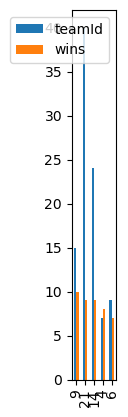

In [247]:
top5_teams.plot(kind='bar')

plt.pie(top5_teams['wins'].value_counts(), labels=top5_teams['teamId'].value_counts().index)
plt.title('Top 5 winning teams');

In [ ]:
# Start to investigate. Who are the winners of each race season?

results_winners = results[results['pos'] == 1]  # Filter rows where pos == 1
driver_ids = results_winners['driverId']  # Extract unique driver IDs

print(driver_ids)


Empty DataFrame
Columns: [teamId, count_pos1]
Index: []


In [ ]:
# Most sucessul team by podiums?


In [ ]:
# 1962 - 1990 points system 8 6 4 3 2 1 FL

In [ ]:
# 2003 - 2009 popints system 10 8 6 5 4 3 2 1 NOFL

In [ ]:
# 2019 - 2024 F1 points system 25 18 15 12 10 8 6 4 2 1 FL